In [1]:
import scipy.io

# Load the data from the provided .mat file
file_path = 'EEG driver drowsiness dataset.mat'
mat_data = scipy.io.loadmat(file_path)

# Inspecting the keys and structure of the loaded data
mat_data.keys(), {key: type(mat_data[key]) for key in mat_data.keys()}


(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

In [2]:
# Inspecting the shape and content of the EEGsample, subindex, and substate arrays
eeg_sample_shape = mat_data['EEGsample'].shape
subindex_shape = mat_data['subindex'].shape
substate_shape = mat_data['substate'].shape

eeg_sample_shape, subindex_shape, substate_shape


((2022, 30, 384), (2022, 1), (2022, 1))

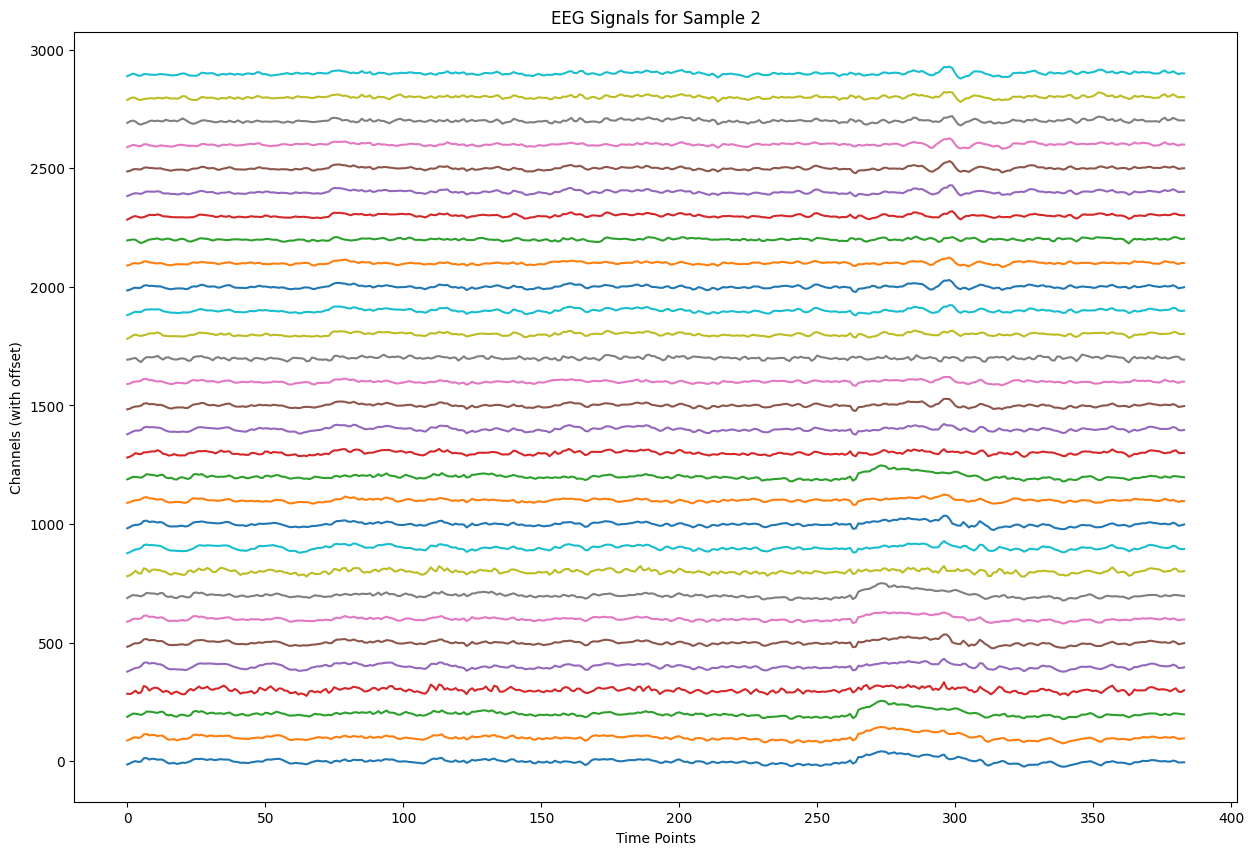

(array([-0.05792682, -0.06351555,  0.14890564, -0.18467282, -0.17752006,
        -0.39788845, -0.07413507,  0.11616144, -0.3156766 , -0.1063466 ,
        -0.36158531,  0.18382309,  0.09985874,  0.05850645, -0.15938398,
         0.23250738,  0.18014723, -0.00527105,  0.11466932, -0.07189589,
         0.29312204,  0.33317233,  0.24625525,  0.19316589, -0.1603197 ,
        -0.08455034,  0.5784712 ,  0.26290482,  0.45588989,  0.30242333]),
 array([11.52511619, 12.17982693, 12.80424703,  9.54022162,  9.59774109,
         9.15466428,  9.03699968, 11.94298744,  8.20282681,  8.84432313,
         9.08561196,  6.33512116, 11.1483652 ,  7.10288247,  8.06464388,
         7.25143882,  5.51567426,  5.79249335,  6.30287865,  7.21981603,
         6.6127059 ,  5.27618496,  4.63673355,  5.97853344,  6.83583311,
         6.58965781,  5.72503376,  6.32138853,  6.13492961,  6.5362168 ]))

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting a sample from EEG data for visualization
eeg_sample = mat_data['EEGsample']
sample_index = 2  # Example sample index
eeg_example = eeg_sample[sample_index]

# Plotting the EEG signals for the chosen sample
plt.figure(figsize=(15, 10))
for i in range(eeg_example.shape[0]):
    plt.plot(eeg_example[i, :] + 100 * i)  # Offset each channel for clarity

plt.title(f'EEG Signals for Sample {sample_index}')
plt.xlabel('Time Points')
plt.ylabel('Channels (with offset)')
plt.show()

# Calculating basic statistics for each channel
mean_vals = np.mean(eeg_example, axis=1)
std_vals = np.std(eeg_example, axis=1)

mean_vals, std_vals


In [7]:
from scipy.signal import welch

# Frequency bands in Hz
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 12),
    "Beta": (12, 30),
    "Gamma": (30, 100)
}

# Sampling rate from the dataset description
fs = 500  # Hz

# Function to calculate power in each frequency band
def band_power(data, fs, band):
    f, Pxx = welch(data, fs=fs, nperseg=1024)
    band_f = Pxx[(f >= band[0]) & (f <= band[1])]
    return band_f.sum()

# Analyzing frequency bands for each channel in the example EEG sample
band_powers = {band: np.array([band_power(eeg_example[i, :], fs, freq_range) for i in range(eeg_example.shape[0])])
               for band, freq_range in bands.items()}

band_powers['Delta'], band_powers['Theta'], band_powers['Alpha'], band_powers['Beta'], band_powers['Gamma']


C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 1024 is greater than input length  = 384, using nperseg = 384
  warnings.warn('nperseg = {0:d} is greater than input length '


(array([24.71314055, 30.98599581, 31.18151168,  9.45402294,  6.81490884,
         6.33949565, 13.34529262, 26.00589996,  3.96379081,  5.69948074,
         6.21003458,  2.59116895, 21.30753045,  4.65575563,  4.9962636 ,
         1.24850342,  1.43356418,  0.99114117,  4.24860641,  4.81295072,
         1.7191491 ,  0.78917288,  0.5656612 ,  2.80502166,  4.07294442,
         1.00513287,  0.33801092,  3.80456253,  1.37948202,  2.05952373]),
 array([37.12024866, 41.27255966, 49.71375697,  9.14233472, 16.34501917,
        10.29476495, 15.76341789, 43.8502091 ,  7.68258055, 12.1313981 ,
        10.46150233,  4.35979737, 38.28504576,  9.29206814, 13.76024044,
         6.79568207,  3.77804585,  2.44143148,  6.27706198, 10.86307219,
         4.50730817,  3.33166537,  2.01368851,  4.85024997,  5.25894895,
         4.6430387 ,  1.03124549,  5.42517448,  4.40788955,  5.14868894]),
 array([10.94892273, 13.22508609, 13.02571932,  3.63210336,  3.93802259,
         6.18238758,  7.26621956, 10.31805582, 

In [8]:
# Inspecting the first few values of the substate array to understand its representation
substate_values = mat_data['substate'][:10].flatten()
substate_values


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [11]:
band_powers

{'Delta': array([24.71314055, 30.98599581, 31.18151168,  9.45402294,  6.81490884,
         6.33949565, 13.34529262, 26.00589996,  3.96379081,  5.69948074,
         6.21003458,  2.59116895, 21.30753045,  4.65575563,  4.9962636 ,
         1.24850342,  1.43356418,  0.99114117,  4.24860641,  4.81295072,
         1.7191491 ,  0.78917288,  0.5656612 ,  2.80502166,  4.07294442,
         1.00513287,  0.33801092,  3.80456253,  1.37948202,  2.05952373]),
 'Theta': array([37.12024866, 41.27255966, 49.71375697,  9.14233472, 16.34501917,
        10.29476495, 15.76341789, 43.8502091 ,  7.68258055, 12.1313981 ,
        10.46150233,  4.35979737, 38.28504576,  9.29206814, 13.76024044,
         6.79568207,  3.77804585,  2.44143148,  6.27706198, 10.86307219,
         4.50730817,  3.33166537,  2.01368851,  4.85024997,  5.25894895,
         4.6430387 ,  1.03124549,  5.42517448,  4.40788955,  5.14868894]),
 'Alpha': array([10.94892273, 13.22508609, 13.02571932,  3.63210336,  3.93802259,
         6.18238758,

In [13]:
import pandas as pd

# Function to calculate band powers for a given EEG sample
def calculate_band_powers(sample, fs, bands):
    powers = {}
    for band_name, freq_range in bands.items():
        powers[band_name] = band_power(sample, fs, freq_range)
    return powers

# Creating a new dataset
new_dataset = []

for i in range(mat_data['EEGsample'].shape[0]):
    for channel in range(mat_data['EEGsample'].shape[1]):
        band_powers = calculate_band_powers(mat_data['EEGsample'][i, channel, :], fs, bands)
        band_powers['State'] = mat_data['substate'][i, 0]
        new_dataset.append(band_powers)

# Converting the new dataset into a pandas DataFrame
df = pd.DataFrame(new_dataset)

# Saving the new dataset to a CSV file (optional)
df.to_csv('aggregated_eeg_data.csv', index=False)

df.head()


C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 1024 is greater than input length  = 384, using nperseg = 384
  warnings.warn('nperseg = {0:d} is greater than input length '


,Delta,Theta,Alpha,Beta,Gamma,State
0,2.531360,3.781156,2.352911,9.165605,8.821803,0
1,1.989913,4.492916,2.692606,8.661348,7.850697,0
2,2.263905,2.624312,2.717160,5.647866,7.048587,0
3,3.479103,3.542129,1.604997,8.985788,9.554042,0
4,3.183120,3.148186,1.264554,13.859621,8.323882,0


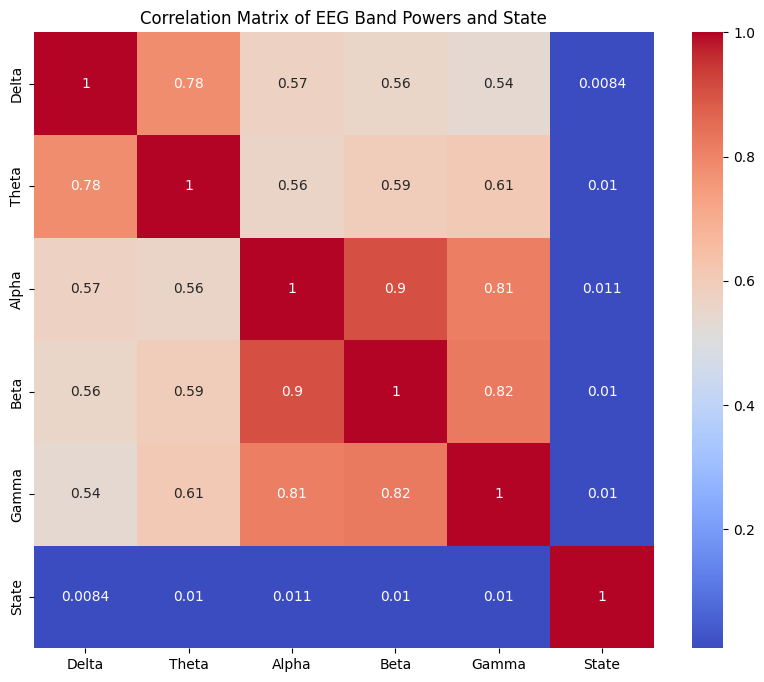

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with band powers and state

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of EEG Band Powers and State')
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('aggregated_eeg_data.csv')

# Preparing the data
X = df.drop('State', axis=1)  # Features
y = df['State']               # Target


X_scaled = X

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Creating and training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.6949664798329487
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      9096
           1       0.70      0.67      0.69      9102

    accuracy                           0.69     18198
   macro avg       0.70      0.69      0.69     18198
weighted avg       0.70      0.69      0.69     18198



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the data
df = pd.read_csv('aggregated_eeg_data.csv')

# Preparing the data
X = df.drop('State', axis=1).values  # Features
y = df['State'].values               # Target

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Building the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # '1' for binary classification

# Compiling the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")


Epoch 1/10
1327/1327 [==============================] - 7s 3ms/step - loss: 0.6779 - accuracy: 0.5813 - val_loss: 0.6591 - val_accuracy: 0.5994
Epoch 2/10
1327/1327 [==============================] - 4s 3ms/step - loss: 0.6382 - accuracy: 0.6478 - val_loss: 0.6322 - val_accuracy: 0.6517
Epoch 3/10
1327/1327 [==============================] - 3s 3ms/step - loss: 0.6281 - accuracy: 0.6567 - val_loss: 0.6293 - val_accuracy: 0.6611
Epoch 4/10
1327/1327 [==============================] - 4s 3ms/step - loss: 0.6247 - accuracy: 0.6609 - val_loss: 0.6263 - val_accuracy: 0.6611
Epoch 5/10
1327/1327 [==============================] - 4s 3ms/step - loss: 0.6221 - accuracy: 0.6642 - val_loss: 0.6234 - val_accuracy: 0.6601
Epoch 6/10
1327/1327 [==============================] - 4s 3ms/step - loss: 0.6217 - accuracy: 0.6625 - val_loss: 0.6219 - val_accuracy: 0.6618
Epoch 7/10
1327/1327 [==============================] - 4s 3ms/step - loss: 0.6191 - accuracy: 0.6661 - val_loss: 0.6226 - val_accuracy: